In [64]:
'''
#실패
이상치 평균, std , 주성분 분석,  XGB
rg3불량 예측 못 함
'''

'\n#실패\n이상치 평균, std , 주성분 분석,  XGB\nrg3불량 예측 못 함\n'

In [65]:
import pandas as pd

In [66]:
label_data = pd.read_csv('./dataset/labeled_data.csv')

In [67]:
label_data['EQUIP_NAME'].value_counts()

EQUIP_NAME
650톤-우진2호기    7992
1800TON-우진       2
650톤-우진          2
Name: count, dtype: int64

In [68]:
label_data['PART_NAME'].value_counts()

PART_NAME
CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, LH         628
RG3 MOLD'G W/SHLD, RH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: count, dtype: int64

In [69]:
def make_input(data, machine_name, product_name):
    # 설비 이름과 제품 이름으로 데이터를 필터링
    machine = data['EQUIP_NAME'] == machine_name
    product = data['PART_NAME'] == product_name
    filtered_data = data[machine & product].copy() # 필터 조건 적용

    # 불필요한 열 제거
    filtered_data.drop(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL','Barrel_Temperature_7',
                        'Reason', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME','Switch_Over_Position',
                        'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5',
                        'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8',
                        'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11',
                        'Mold_Temperature_12'],
                       axis=1, inplace=True)
    
    return filtered_data


In [70]:
# 데이터 호기 종류
machine_name = "650톤-우진2호기"

# 데이터 제품 종류
product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

# "650톤-우진2호기", "CN7 W/S SIDE MLD'G LH" 데이터만 변수를 제거하여 가져옴
cn7lh = make_input(label_data, machine_name, product_name[0])

# "650톤-우진2호기", "CN7 W/S SIDE MLD'G RH" 데이터만 변수를 제거하여 가져옴
cn7rh = make_input(label_data, machine_name, product_name[1])

# "650톤-우진2호기", "RG3 MOLD'G W/SHLD, LH" 데이터만 변수를 제거하여 가져옴
rg3lh = make_input(label_data, machine_name, product_name[2])

# "650톤-우진2호기", "RG3 MOLD'G W/SHLD, RH" 데이터만 변수를 제거하여 가져옴
rg3rh = make_input(label_data, machine_name, product_name[3])

# 통합된 제품 CN7 LH와 RH를 합쳐줌
cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)



In [71]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1).astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6360\492777852.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1).astype(int)


In [72]:
cn7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   int32  
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Plasticizing_Time         6736 non-null   float64
 4   Cycle_Time                6736 non-null   float64
 5   Clamp_Close_Time          6736 non-null   float64
 6   Cushion_Position          6736 non-null   float64
 7   Plasticizing_Position     6736 non-null   float64
 8   Clamp_Open_Position       6736 non-null   float64
 9   Max_Injection_Speed       6736 non-null   float64
 10  Max_Screw_RPM             6736 non-null   float64
 11  Average_Screw_RPM         6736 non-null   float64
 12  Max_Injection_Pressure    6736 non-null   float64
 13  Max_Switch_Over_Pressure  6736 non-null   float64
 14  Max_Back

In [73]:
cn7

PassOrFail  Injection_Time  Filling_Time  Plasticizing_Time  Cycle_Time  \
0              0            9.60          4.48          16.910000   59.580002   
1              0            9.59          4.48          16.910000   59.560001   
2              0            9.58          4.46          16.900000   59.580002   
3              0            9.58          4.46          16.920000   59.560001   
4              0            9.57          4.45          16.910000   59.520000   
...          ...             ...           ...                ...         ...   
6731           0            9.58          4.46          16.670000   59.520000   
6732           0            9.60          4.49          16.650000   59.540001   
6733           0            9.60          4.48          16.620001   59.560001   
6734           0            9.60          4.48          16.650000   59.560001   
6735           0            9.60          4.48          16.629999   59.580002   

      Clamp_Close_Time  Cushion_Position  Plasticizing_Position  \
0                 7.13        653.409973              68.839996   
1                 7.13        653.419983              68.839996   
2                 7.13        653.409973              68.839996   
3                 7.13        653.409973              68.849998   
4                 7.14        653.409973              68.830002   
...                ...               ...                    ...   
6731              7.11        653.429993              68.339996   
6732              7.11        653.429993              68.320000   
6733              7.11        653.429993              68.330002   
6734              7.11        653.429993              68.349998   
6735              7.11        653.429993              68.330002   

      Clamp_Open_Position  Max_Injection_Speed  ...  Average_Back_Pressure  \
0               647.98999            55.299999  ...              59.299999   
1               647.98999            55.299999  ...              59.299999   
2               647.98999            55.599998  ...              59.400002   
3               647.98999            55.500000  ...              59.299999   
4               647.98999            55.700001  ...              59.099998   
...                   ...                  ...  ...                    ...   
6731            647.98999            55.200001  ...              59.700001   
6732            647.98999            54.900002  ...              59.799999   
6733            647.98999            54.900002  ...              59.900002   
6734            647.98999            55.000000  ...              59.900002   
6735            647.98999            54.900002  ...              59.900002   

      Barrel_Temperature_1  Barrel_Temperature_2  Barrel_Temperature_3  \
0               276.200012            275.500000            275.299988   
1               276.500000            275.000000            275.399994   
2               276.299988            275.299988            275.200012   
3               275.799988            275.399994            275.000000   
4               275.700012            274.899994            274.799988   
...                    ...                   ...                   ...   
6731            275.799988            275.500000            275.500000   
6732            276.100006            275.899994            274.899994   
6733            276.500000            274.899994            275.100006   
6734            275.799988            275.299988            275.500000   
6735            276.100006            275.799988            275.000000   

      Barrel_Temperature_4  Barrel_Temperature_5  Barrel_Temperature_6  \
0               270.799988            254.699997            229.500000   
1               271.100006            254.899994            230.000000   
2               271.399994            255.000000            230.000000   
3               271.299988            255.000000            230.000000   
4               270.799988      

In [74]:
cn7['Clamp_Open_Position'].unique()

array([647.98999023,  69.63999939])

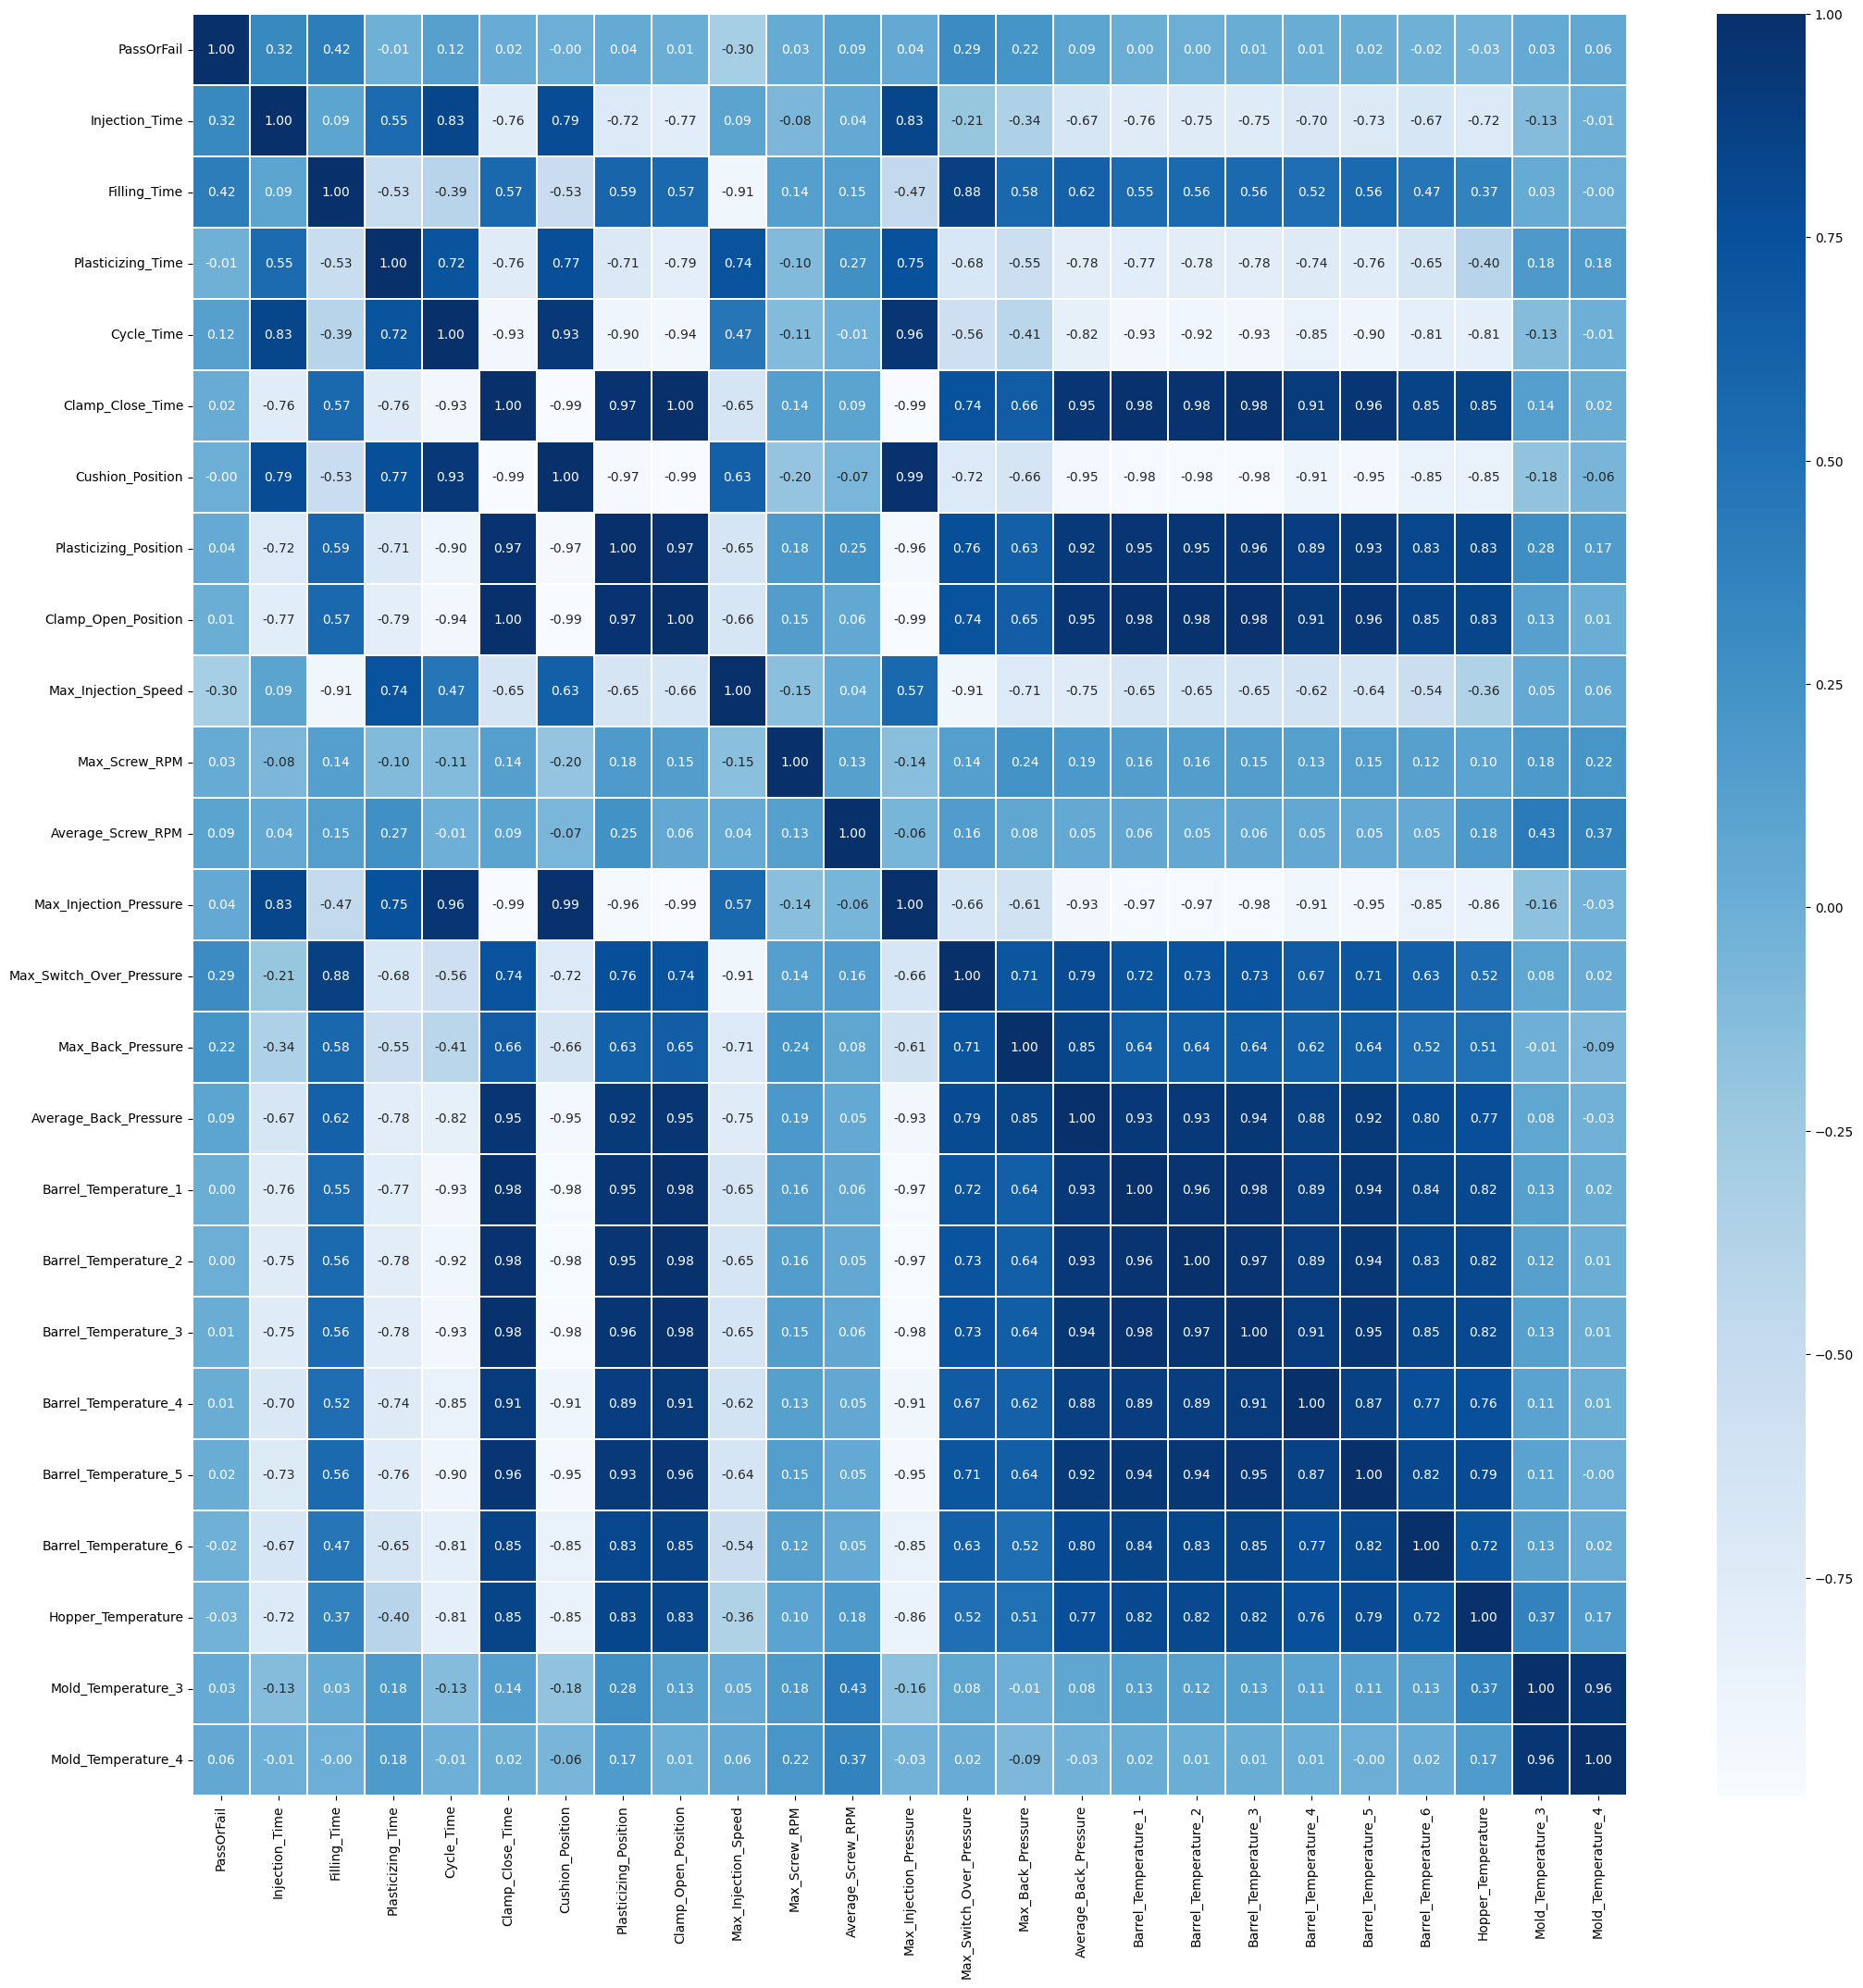

In [75]:
import matplotlib.pyplot as plt  # plt를 불러옵니다.
import seaborn as sns  

plt.figure(figsize=(25, 25))  # subsplots가 아니라 figure 사용
sns.heatmap(data=cn7.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')
plt.show()  # 그래프를 출력

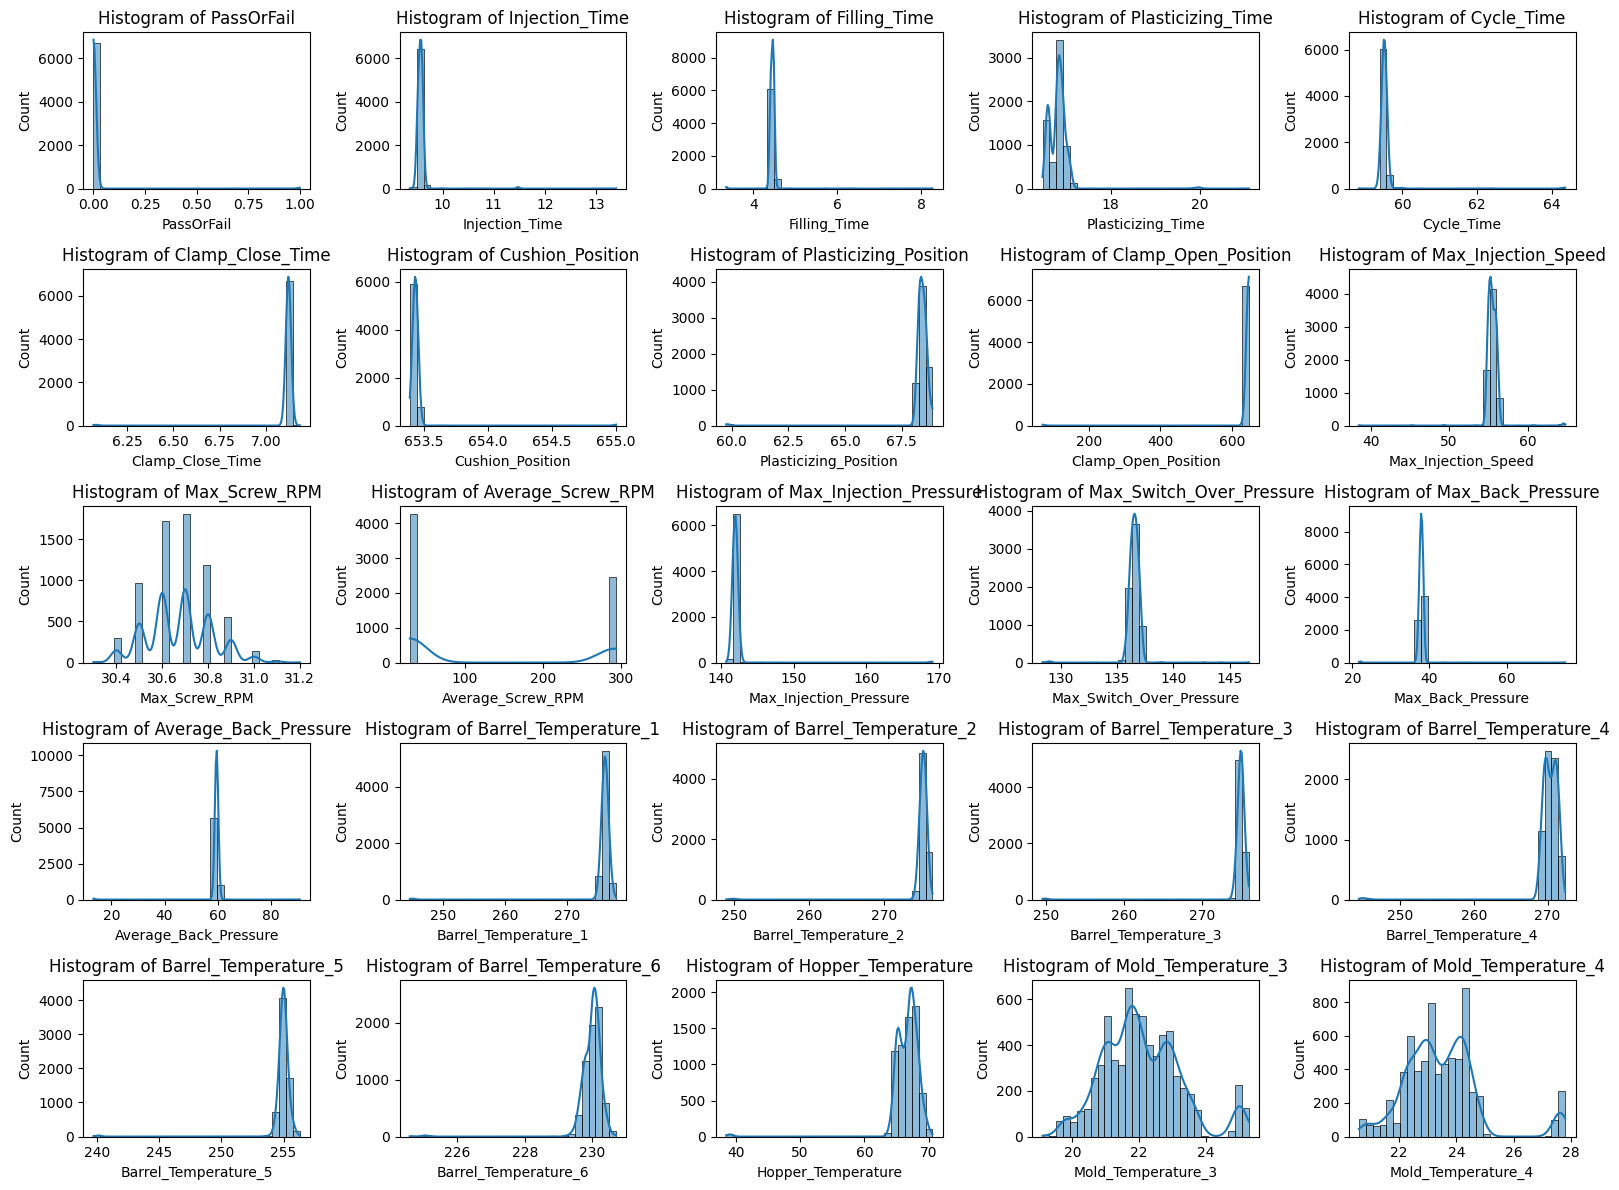

In [76]:
# Plot histograms for all numeric columns in the CN7 dataset
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(cn7[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


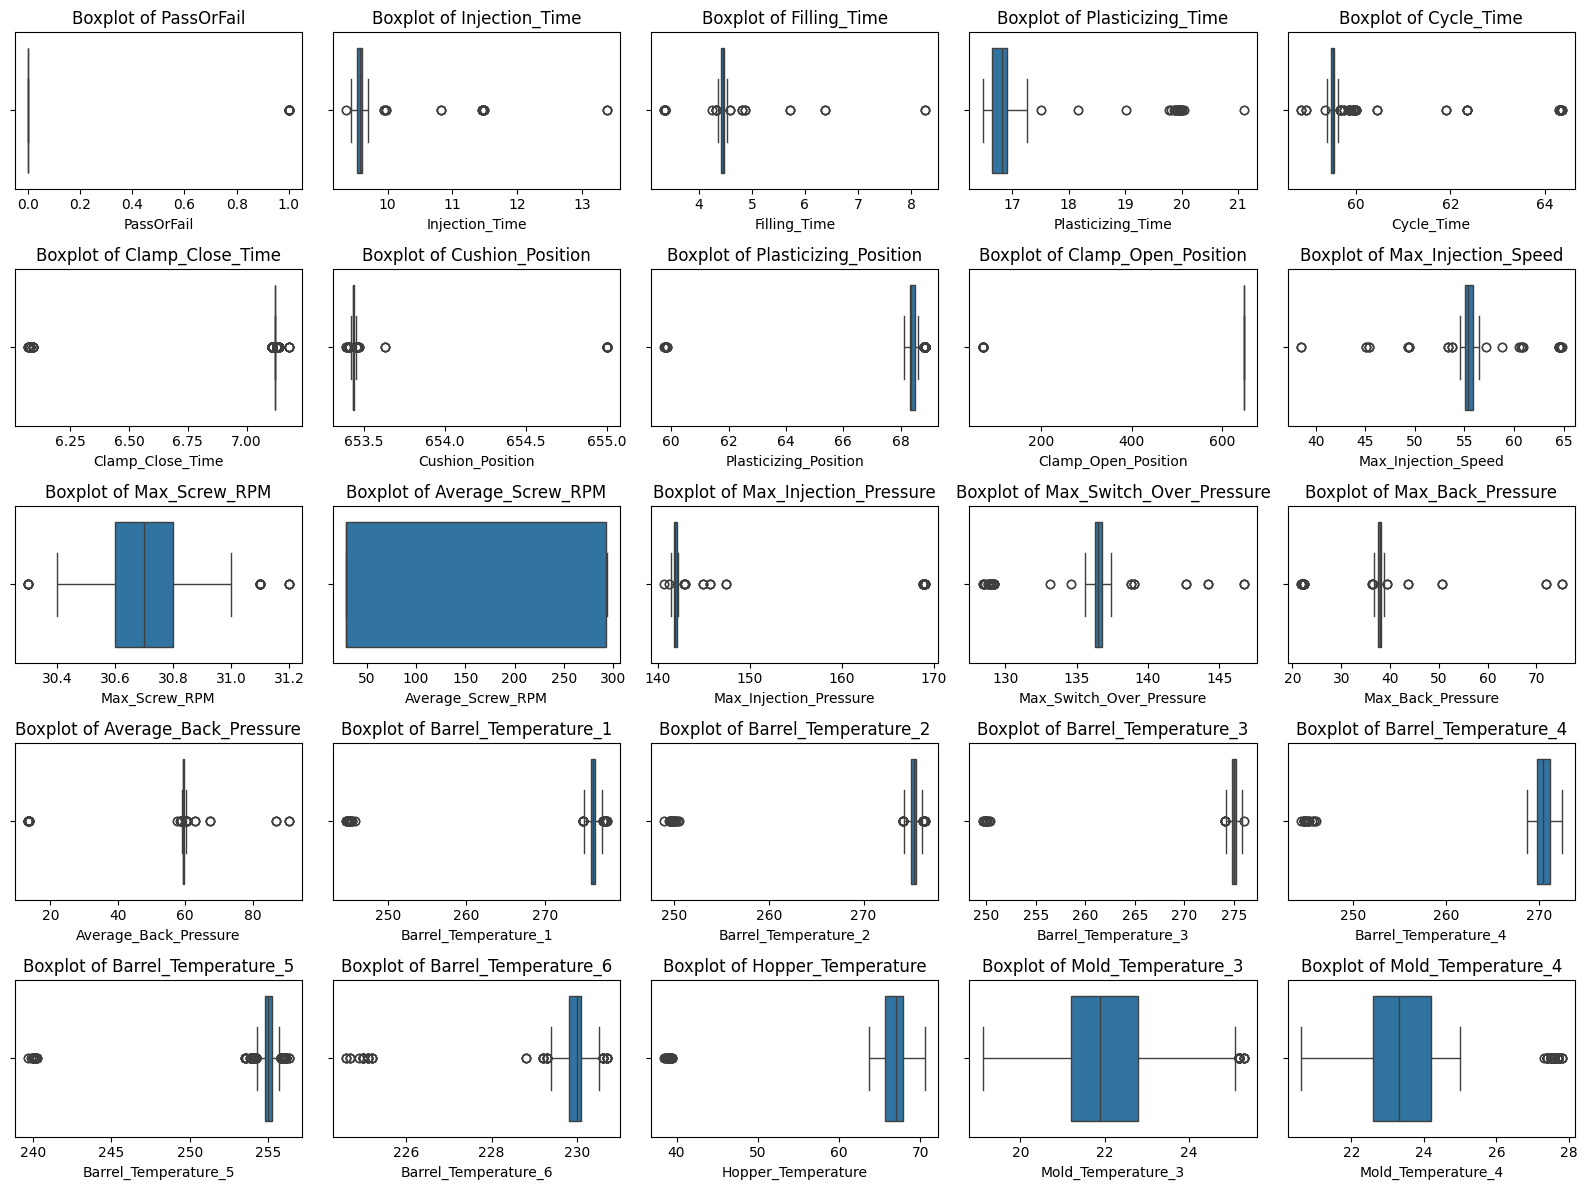

In [77]:
# Generate boxplots for all numeric columns in the CN7 dataset
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=cn7[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [78]:
# 이상치 제거
def handle_outliers_iqr(data, columns):

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Numeric columns excluding 'PassOrFail'
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns.drop('PassOrFail')

# Apply the outlier handling function
cn7_no_outliers = handle_outliers_iqr(cn7.copy(), numeric_columns)

# Display the size of the dataset after outlier removal
cn7.shape, cn7_no_outliers.shape


((6736, 25), (2890, 25))

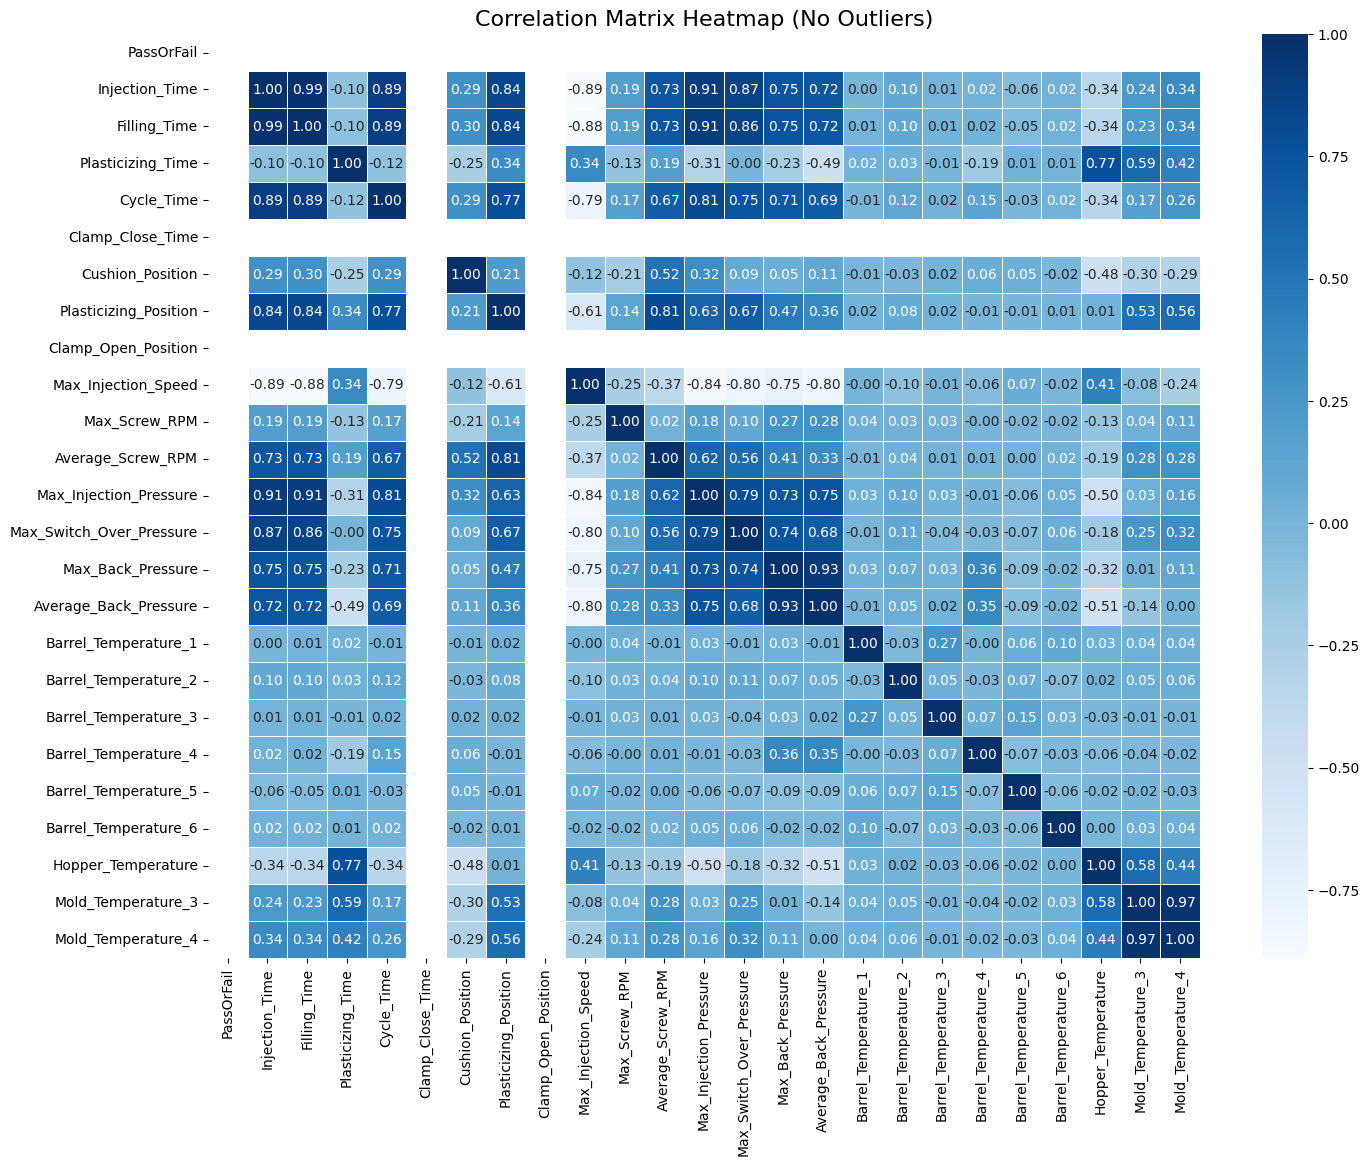

PassOrFail                 NaN
Injection_Time             NaN
Filling_Time               NaN
Plasticizing_Time          NaN
Cycle_Time                 NaN
Clamp_Close_Time           NaN
Cushion_Position           NaN
Plasticizing_Position      NaN
Clamp_Open_Position        NaN
Max_Injection_Speed        NaN
Max_Screw_RPM              NaN
Average_Screw_RPM          NaN
Max_Injection_Pressure     NaN
Max_Switch_Over_Pressure   NaN
Max_Back_Pressure          NaN
Average_Back_Pressure      NaN
Barrel_Temperature_1       NaN
Barrel_Temperature_2       NaN
Barrel_Temperature_3       NaN
Barrel_Temperature_4       NaN
Barrel_Temperature_5       NaN
Barrel_Temperature_6       NaN
Hopper_Temperature         NaN
Mold_Temperature_3         NaN
Mold_Temperature_4         NaN
Name: PassOrFail, dtype: float64

In [79]:
# Generate a correlation matrix for the dataset without outliers
correlation_matrix = cn7_no_outliers.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (No Outliers)", fontsize=16)
plt.show()

# Extract correlations with 'PassOrFail' and sort by absolute value
pass_or_fail_correlation = correlation_matrix['PassOrFail'].sort_values(ascending=False)
pass_or_fail_correlation

In [80]:
# 이상치를 평균으로 대체하는 함수 정의
def handle_outliers_iqr_with_mean(data, columns):

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # 이상치를 평균값으로 대체
        mean = data[col].mean()
        data[col] = data[col].apply(lambda x: mean if (x < lower_bound or x > upper_bound) else x)
    return data

# PassOrFail 열을 제외한 수치형 열에 대해 처리
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns.drop('PassOrFail')

# 이상치를 평균으로 대체
cn7 = handle_outliers_iqr_with_mean(cn7, numeric_columns)

# 처리된 데이터셋 확인
cn7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   int32  
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Plasticizing_Time         6736 non-null   float64
 4   Cycle_Time                6736 non-null   float64
 5   Clamp_Close_Time          6736 non-null   float64
 6   Cushion_Position          6736 non-null   float64
 7   Plasticizing_Position     6736 non-null   float64
 8   Clamp_Open_Position       6736 non-null   float64
 9   Max_Injection_Speed       6736 non-null   float64
 10  Max_Screw_RPM             6736 non-null   float64
 11  Average_Screw_RPM         6736 non-null   float64
 12  Max_Injection_Pressure    6736 non-null   float64
 13  Max_Switch_Over_Pressure  6736 non-null   float64
 14  Max_Back

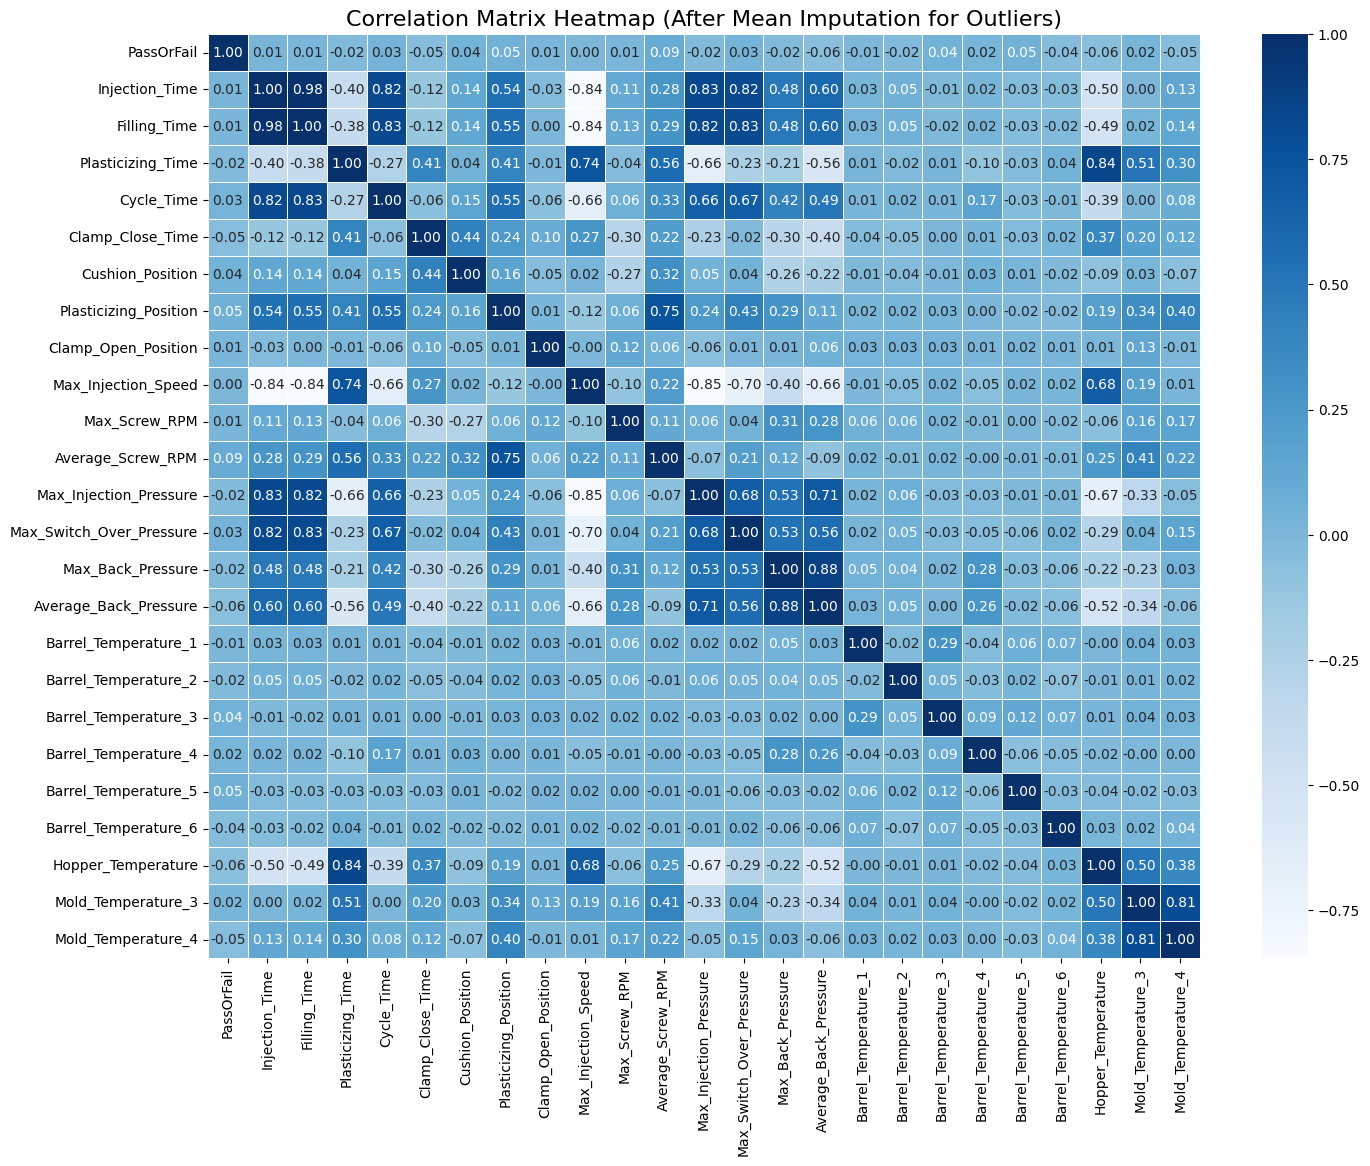

In [81]:
# Generate a correlation matrix for the CN7 dataset after outlier treatment with mean substitution
correlation_matrix_mean_imputed = cn7.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_mean_imputed, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After Mean Imputation for Outliers)", fontsize=16)
plt.show()


In [82]:
# Identify and display the variables that have a high correlation with 'PassOrFail'
# Sort the correlation values by absolute value to identify the most significant ones
correlation_with_target = correlation_matrix_mean_imputed['PassOrFail'].sort_values(ascending=False)

# Display the most correlated variables
correlation_with_target

PassOrFail                  1.000000
Average_Screw_RPM           0.092282
Plasticizing_Position       0.054202
Barrel_Temperature_5        0.051108
Barrel_Temperature_3        0.044599
Cushion_Position            0.038516
Max_Switch_Over_Pressure    0.031192
Cycle_Time                  0.030038
Mold_Temperature_3          0.022147
Barrel_Temperature_4        0.021399
Injection_Time              0.014489
Filling_Time                0.009775
Max_Screw_RPM               0.009358
Clamp_Open_Position         0.005594
Max_Injection_Speed         0.000183
Barrel_Temperature_1       -0.006665
Max_Back_Pressure          -0.016580
Max_Injection_Pressure     -0.017119
Plasticizing_Time          -0.017803
Barrel_Temperature_2       -0.022880
Barrel_Temperature_6       -0.043587
Mold_Temperature_4         -0.047450
Clamp_Close_Time           -0.050373
Average_Back_Pressure      -0.057244
Hopper_Temperature         -0.059551
Name: PassOrFail, dtype: float64

In [83]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# VIF 계산을 위한 함수 정의
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Variable"] = data.columns
    vif["VIF"] = [calculate_single_vif(data, i) for i in range(data.shape[1])]
    return vif

# 각 변수에 대해 VIF 계산
def calculate_single_vif(data, i):
    # 독립변수(다른 변수들)와 회귀 모델을 적합
    x = data.drop(data.columns[i], axis=1)  # 해당 변수 이외의 변수들
    y = data.iloc[:, i]  # 해당 변수
    model = LinearRegression()
    model.fit(x, y)
    # R^2 값 계산
    r2 = model.score(x, y)
    # VIF 계산: 1 / (1 - R^2)
    return 1 / (1 - r2)

# 'PassOrFail'을 제외한 수치형 데이터 선택
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = [col for col in numeric_columns if col != 'PassOrFail']  # 'PassOrFail' 제외

# VIF 데이터 선택
vif_data = cn7[numeric_columns]

# VIF 계산
vif_result = calculate_vif(vif_data)

# VIF 결과 출력
vif_result.sort_values(by="VIF", ascending=False)


Variable        VIF
1               Filling_Time  49.632397
8        Max_Injection_Speed  38.700213
0             Injection_Time  29.582677
2          Plasticizing_Time  17.136560
14     Average_Back_Pressure  15.729535
13         Max_Back_Pressure  13.210967
10         Average_Screw_RPM  11.854870
22        Mold_Temperature_3  10.818117
11    Max_Injection_Pressure   9.206787
6      Plasticizing_Position   8.882554
23        Mold_Temperature_4   7.374405
21        Hopper_Temperature   5.605052
12  Max_Switch_Over_Pressure   5.301605
3                 Cycle_Time   3.875505
4           Clamp_Close_Time   1.988611
5           Cushion_Position   1.957978
18      Barrel_Temperature_4   1.788924
9              Max_Screw_RPM   1.516297
7        Clamp_Open_Position   1.321869
17      Barrel_Temperature_3   1.141234
15      Barrel_Temperature_1   1.122073
20      Barrel_Temperature_6   1.057103
19      Barrel_Temperature_5   1.039627
16      Barrel_Temperature_2   1.028956

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 'PassOrFail'을 제외한 수치형 데이터 선택 (float64, int32 타입의 열만 선택)
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = numeric_columns[numeric_columns != 'PassOrFail']  # 'PassOrFail' 제외

# 수치형 데이터만 선택하여 표준화 (스케일링)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cn7[numeric_columns])

# PCA 적용: 주성분 분석
pca = PCA()
pca.fit(scaled_data)

# 각 주성분이 설명하는 분산 비율
explained_variance = pca.explained_variance_ratio_

# PCA 결과로 나온 주요 성분들
pca_df = pd.DataFrame(pca.components_, columns=numeric_columns)

# 분산 비율과 주요 성분 결과 출력
explained_variance, pca_df.head()


(array([0.28495808, 0.15407845, 0.08270009, 0.05687129, 0.05589652,
        0.0469396 , 0.04521797, 0.04307868, 0.04014415, 0.03686881,
        0.03451224, 0.02797098, 0.02438381, 0.01835361, 0.01436033,
        0.00955573, 0.00791342, 0.00466009, 0.00446391, 0.00265259,
        0.00164211, 0.00128326, 0.00097067, 0.00052361]),
    Injection_Time  Filling_Time  Plasticizing_Time  Cycle_Time  \
 0        0.350134      0.349852          -0.240355    0.300515   
 1        0.158566      0.166795           0.346457    0.179319   
 2        0.093684      0.084503          -0.074819    0.109370   
 3        0.033923      0.036379          -0.089605   -0.010443   
 4       -0.080545     -0.084767           0.134989    0.077753   
 
    Clamp_Close_Time  Cushion_Position  Plasticizing_Position  \
 0         -0.118076         -0.000167               0.122001   
 1          0.224249          0.133337               0.432023   
 2          0.360625          0.523086               0.021388   
 3    

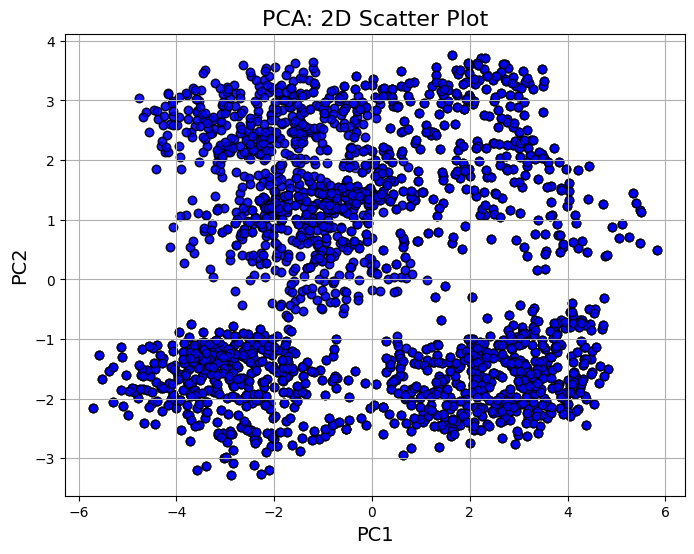

In [85]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 준비 (이미 표준화가 되어 있다고 가정)
numeric_columns = cn7.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = numeric_columns[numeric_columns != 'PassOrFail']  # 'PassOrFail' 제외

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cn7[numeric_columns])

# PCA 적용
pca = PCA(n_components=2)  # 두 개의 주성분으로 축소
pca_result = pca.fit_transform(scaled_data)

# 주성분 분석 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('PCA: 2D Scatter Plot', fontsize=16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.grid(True)
plt.show()


In [86]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Step 1: 데이터 준비 (훈련 데이터와 테스트 데이터 분리)
X = cn7.drop(columns=['PassOrFail'])  # 특성 변수
y = cn7['PassOrFail']  # 목표 변수

# 훈련 데이터와 테스트 데이터로 분리 (80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: XGBoost 모델 설정
model = xgb.XGBClassifier(
    eval_metric='mlogloss',  # 다중 클래스 로지스틱 손실 함수
    n_jobs=-1,               # 병렬 처리 활성화
    random_state=42
)

# Step 3: 하이퍼파라미터 튜닝을 위한 GridSearchCV 설정
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Step 4: 모델 학습 및 튜닝
grid_search.fit(X_train, y_train)

# Step 5: 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"최적 모델의 정확도: {accuracy:.4f}")
print("분류 성능 보고서:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
최적 모델의 정확도: 0.9963
분류 성능 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1338
           1       0.78      0.70      0.74        10

    accuracy                           1.00      1348
   macro avg       0.89      0.85      0.87      1348
weighted avg       1.00      1.00      1.00      1348



In [87]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Step 1: SMOTE를 사용하여 불량품 데이터를 오버샘플링
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: XGBoost 모델 학습
model = xgb.XGBClassifier(eval_metric='mlogloss')
model.fit(X_resampled, y_resampled)

# Step 3: 예측
y_pred_resampled = model.predict(X_test)

# Step 4: 모델 평가 (정밀도, 재현율, F1-score 사용)
print(classification_report(y_test, y_pred_resampled))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1338
           1       0.64      0.70      0.67        10

    accuracy                           0.99      1348
   macro avg       0.82      0.85      0.83      1348
weighted avg       1.00      0.99      0.99      1348



In [89]:
# Step 1: XGBoost 모델 학습 (클래스 가중치 조정)
model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    scale_pos_weight=10,  # 불량품 클래스에 더 높은 가중치를 부여
    random_state=42
)

# Step 2: 모델 훈련
model.fit(X_train, y_train)

# Step 3: 예측
y_pred = model.predict(X_test)

# Step 4: 성능 평가
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1338
           1       0.80      0.80      0.80        10

    accuracy                           1.00      1348
   macro avg       0.90      0.90      0.90      1348
weighted avg       1.00      1.00      1.00      1348

[[1336    2]
 [   2    8]]


### rg3

In [90]:
rg3['PassOrFail'] = rg3['PassOrFail'].replace('Y', 0).replace('N', 1).astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6360\766608017.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rg3['PassOrFail'] = rg3['PassOrFail'].replace('Y', 0).replace('N', 1).astype(int)


In [91]:
rg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                1256 non-null   int32  
 1   Injection_Time            1256 non-null   float64
 2   Filling_Time              1256 non-null   float64
 3   Plasticizing_Time         1256 non-null   float64
 4   Cycle_Time                1256 non-null   float64
 5   Clamp_Close_Time          1256 non-null   float64
 6   Cushion_Position          1256 non-null   float64
 7   Plasticizing_Position     1256 non-null   float64
 8   Clamp_Open_Position       1256 non-null   float64
 9   Max_Injection_Speed       1256 non-null   float64
 10  Max_Screw_RPM             1256 non-null   float64
 11  Average_Screw_RPM         1256 non-null   float64
 12  Max_Injection_Pressure    1256 non-null   float64
 13  Max_Switch_Over_Pressure  1256 non-null   float64
 14  Max_Back

In [92]:
rg3

PassOrFail  Injection_Time  Filling_Time  Plasticizing_Time  Cycle_Time  \
0              0            1.06          0.93              13.01   61.779999   
1              0            1.06          0.93              12.99   61.779999   
2              0            1.06          0.93              12.95   61.759998   
3              0            1.06          0.93              13.02   61.779999   
4              0            1.06          0.93              12.97   61.779999   
...          ...             ...           ...                ...         ...   
1251           0            1.07          0.94              13.06   61.779999   
1252           0            1.07          0.94              13.07   61.759998   
1253           0            1.07          0.94              13.09   61.740002   
1254           0            1.07          0.94              13.12   61.779999   
1255           0            1.07          0.94              12.96   61.779999   

      Clamp_Close_Time  Cushion_Position  Plasticizing_Position  \
0                 6.81        654.289978              53.560001   
1                 6.81        654.280029              53.580002   
2                 6.81        654.270020              53.560001   
3                 6.81        654.270020              53.560001   
4                 6.81        654.280029              53.560001   
...                ...               ...                    ...   
1251              6.79        654.250000              53.610001   
1252              6.79        654.260010              53.610001   
1253              6.79        654.250000              53.619999   
1254              6.79        654.250000              53.610001   
1255              6.79        654.270020              53.669998   

      Clamp_Open_Position  Max_Injection_Speed  ...  Average_Back_Pressure  \
0                    4.63           128.500000  ...              60.299999   
1                    4.63           128.500000  ...              60.500000   
2                    4.63           128.399994  ...              60.200001   
3                    4.63           128.399994  ...              60.400002   
4                    4.63           128.399994  ...              60.299999   
...                   ...                  ...  ...                    ...   
1251                 4.63           127.500000  ...              62.200001   
1252                 4.63           127.599998  ...              61.900002   
1253                 4.63           127.500000  ...              61.599998   
1254                 4.63           127.500000  ...              61.500000   
1255                 4.63           128.000000  ...              60.599998   

      Barrel_Temperature_1  Barrel_Temperature_2  Barrel_Temperature_3  \
0               286.000000            285.000000            285.000000   
1               286.200012            285.799988            285.000000   
2               286.500000            285.100006            285.000000   
3               285.299988            285.500000            284.500000   
4               286.299988            285.899994            285.600006   
...                    ...                   ...                   ...   
1251            285.600006            284.799988            285.399994   
1252            285.600006            285.100006            285.000000   
1253            286.200012            284.799988            285.100006   
1254            285.899994            284.899994            285.700012   
1255            285.899994            284.899994            285.500000   

      Barrel_Temperature_4  Barrel_Temperature_5  Barrel_Temperature_6  \
0               275.399994            265.100006            234.899994   
1               275.600006            265.600006            234.800003   
2               276.000000            265.100006            234.699997   
3               276.000000            264.799988            234.800003   
4               275.399994      

In [93]:
rg3['Clamp_Open_Position'].unique()

array([4.63000011])

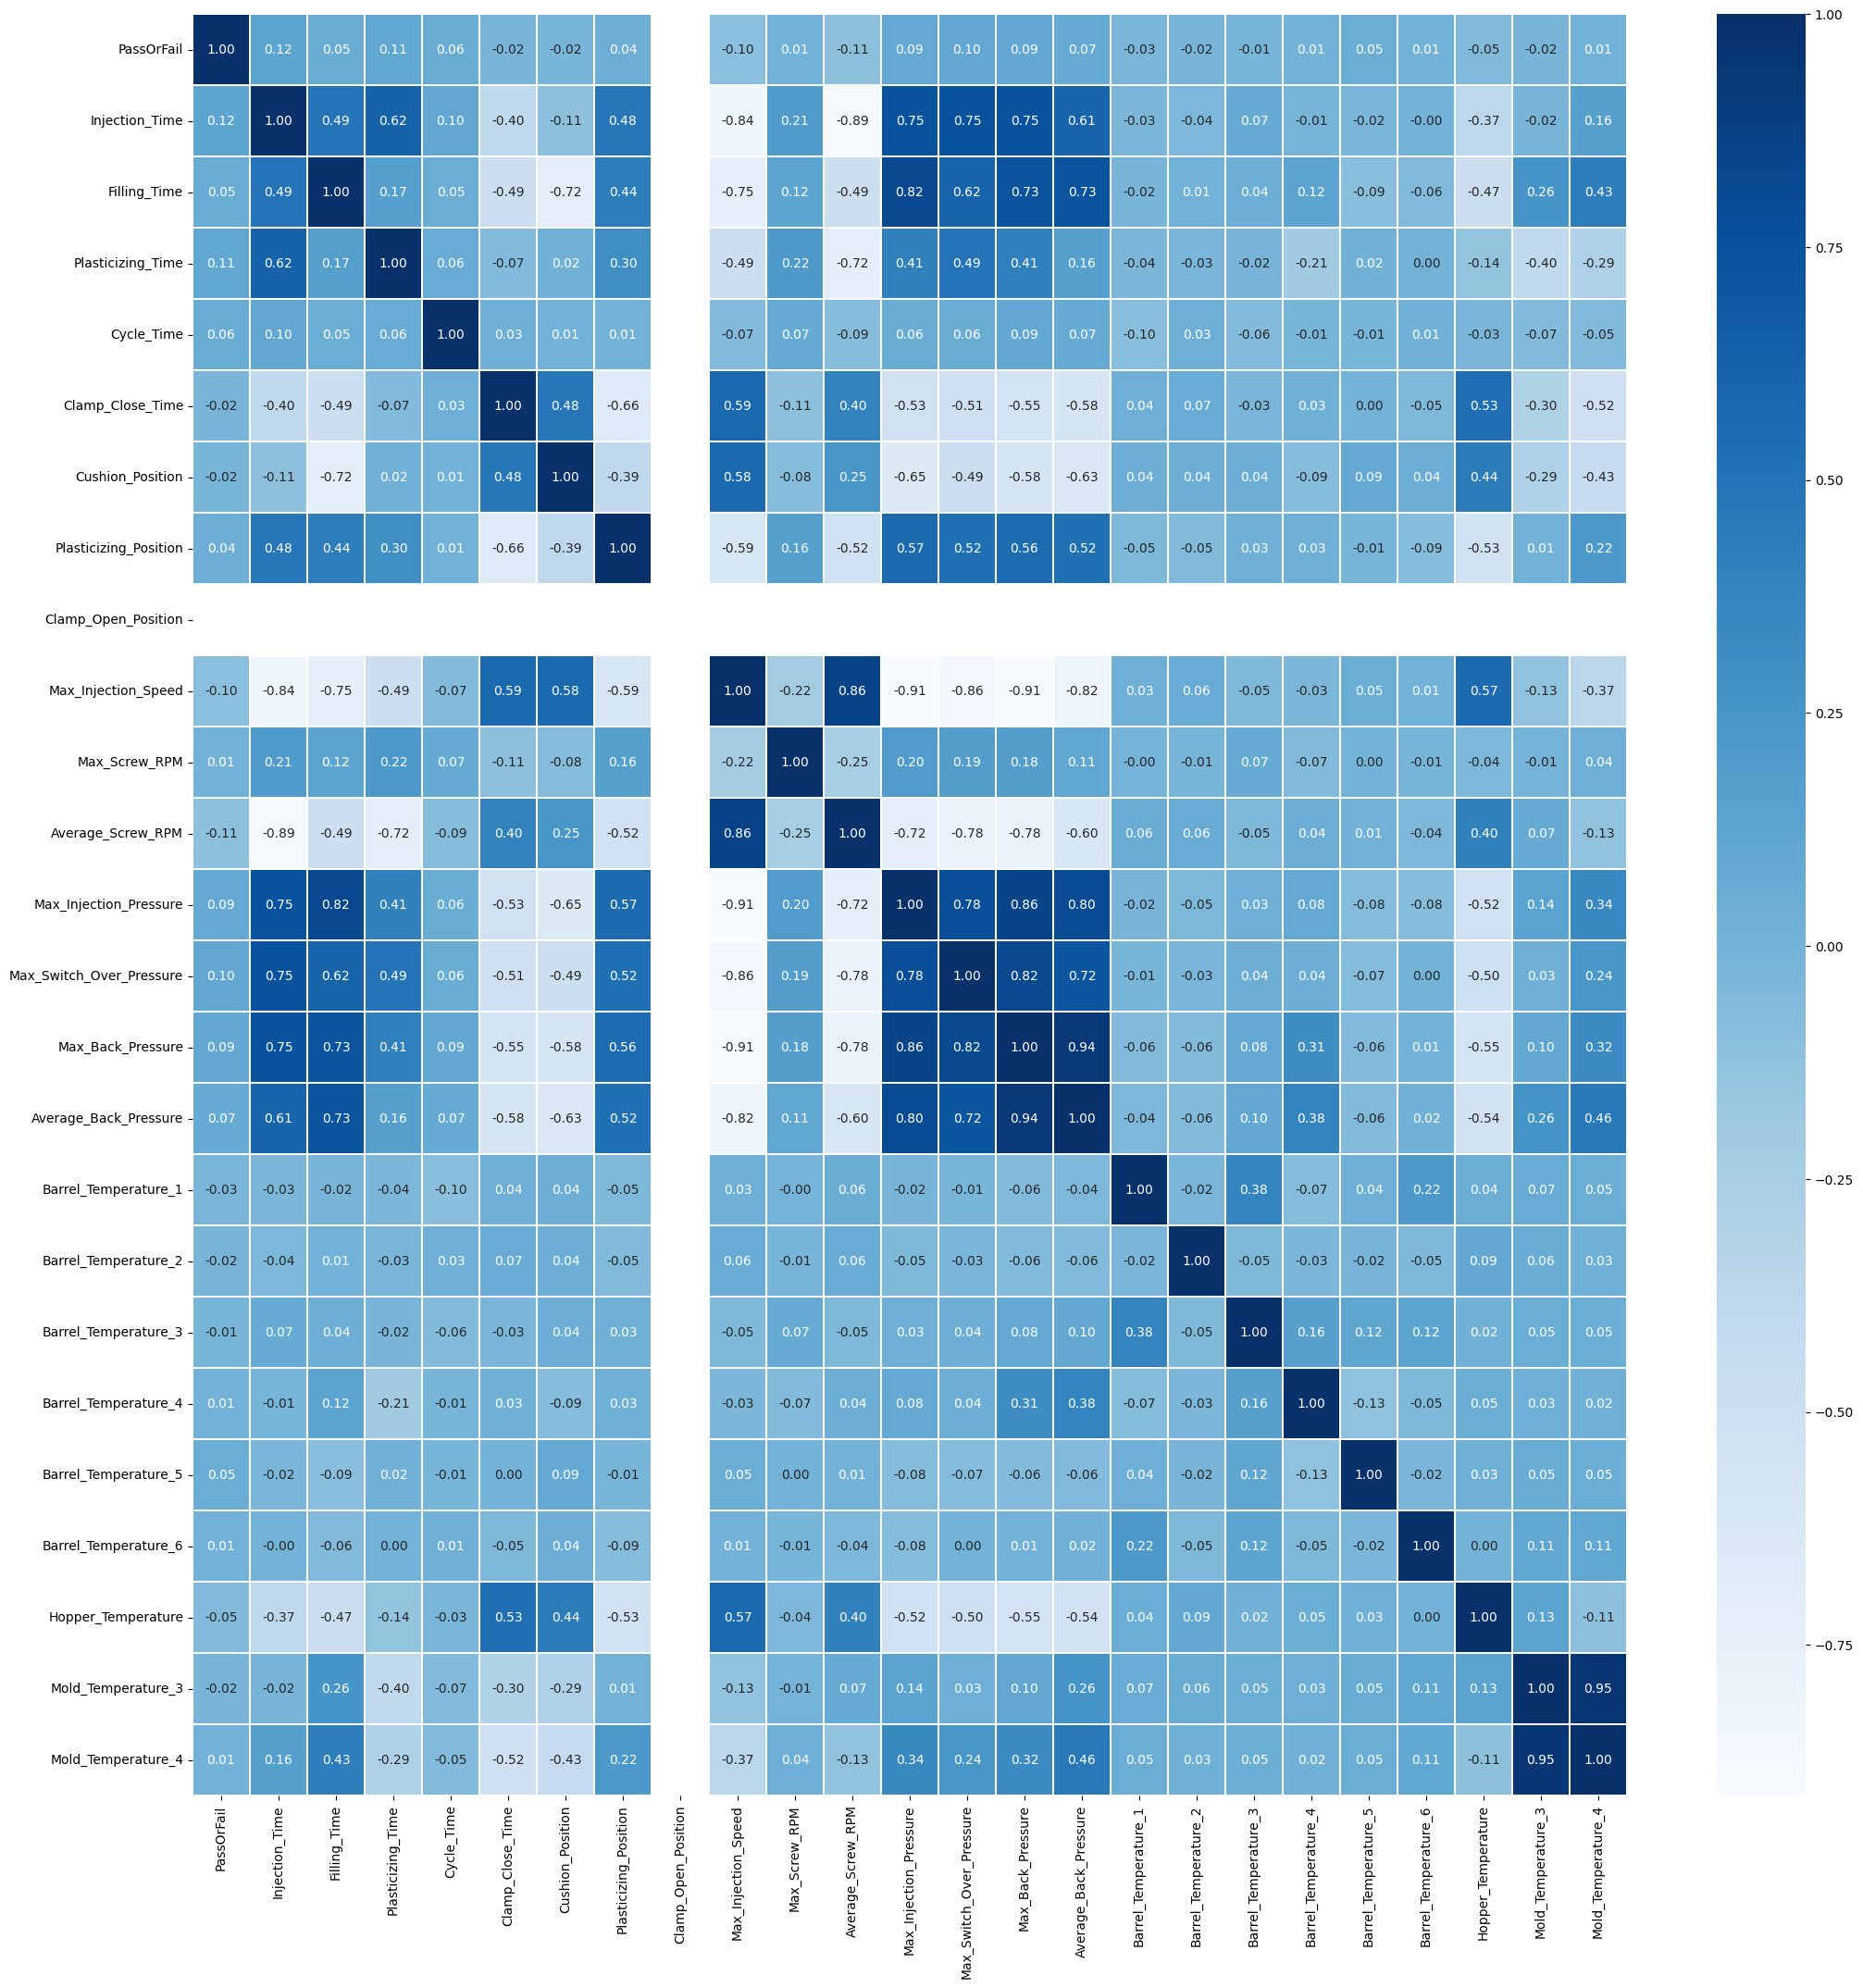

In [94]:
import matplotlib.pyplot as plt  # plt를 불러옵니다.
import seaborn as sns  

plt.figure(figsize=(25, 25))  # subsplots가 아니라 figure 사용
sns.heatmap(data=rg3.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')
plt.show()  # 그래프를 출력

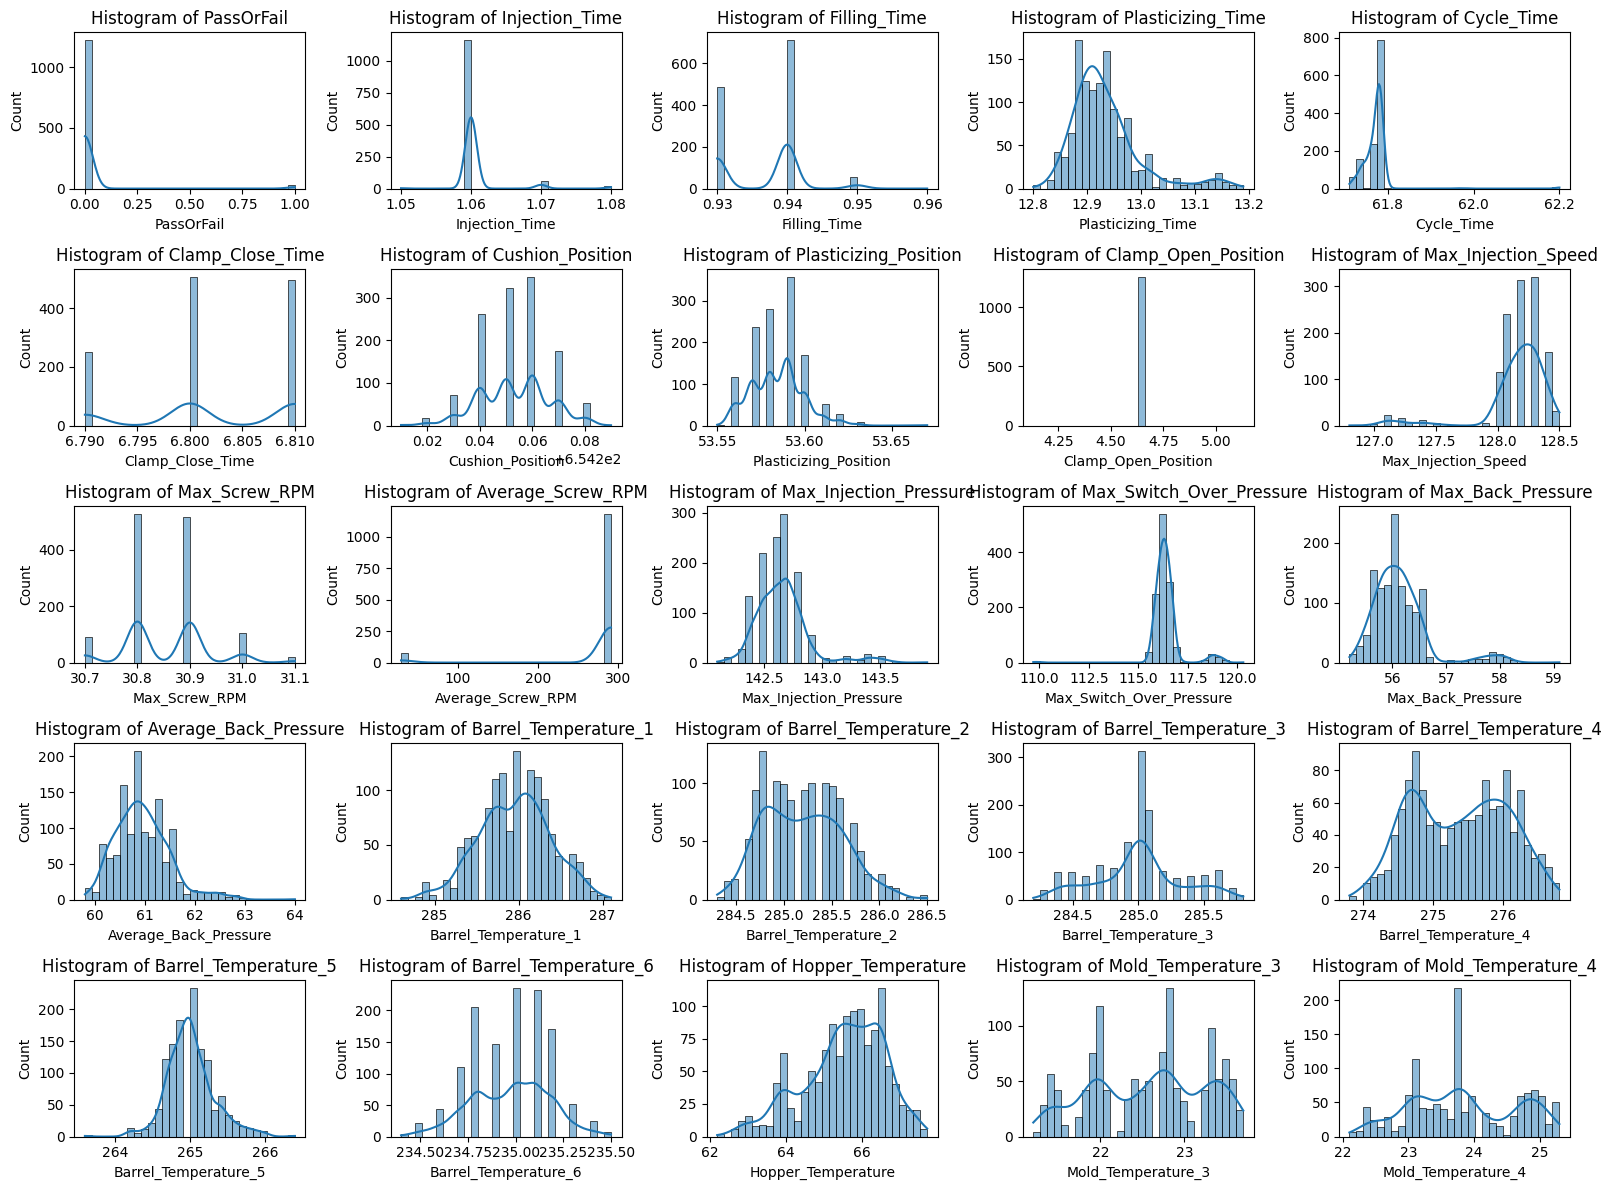

In [95]:
# Plot histograms for all numeric columns in the rg3 dataset
numeric_columns = rg3.select_dtypes(include=['float64', 'int32']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(rg3[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


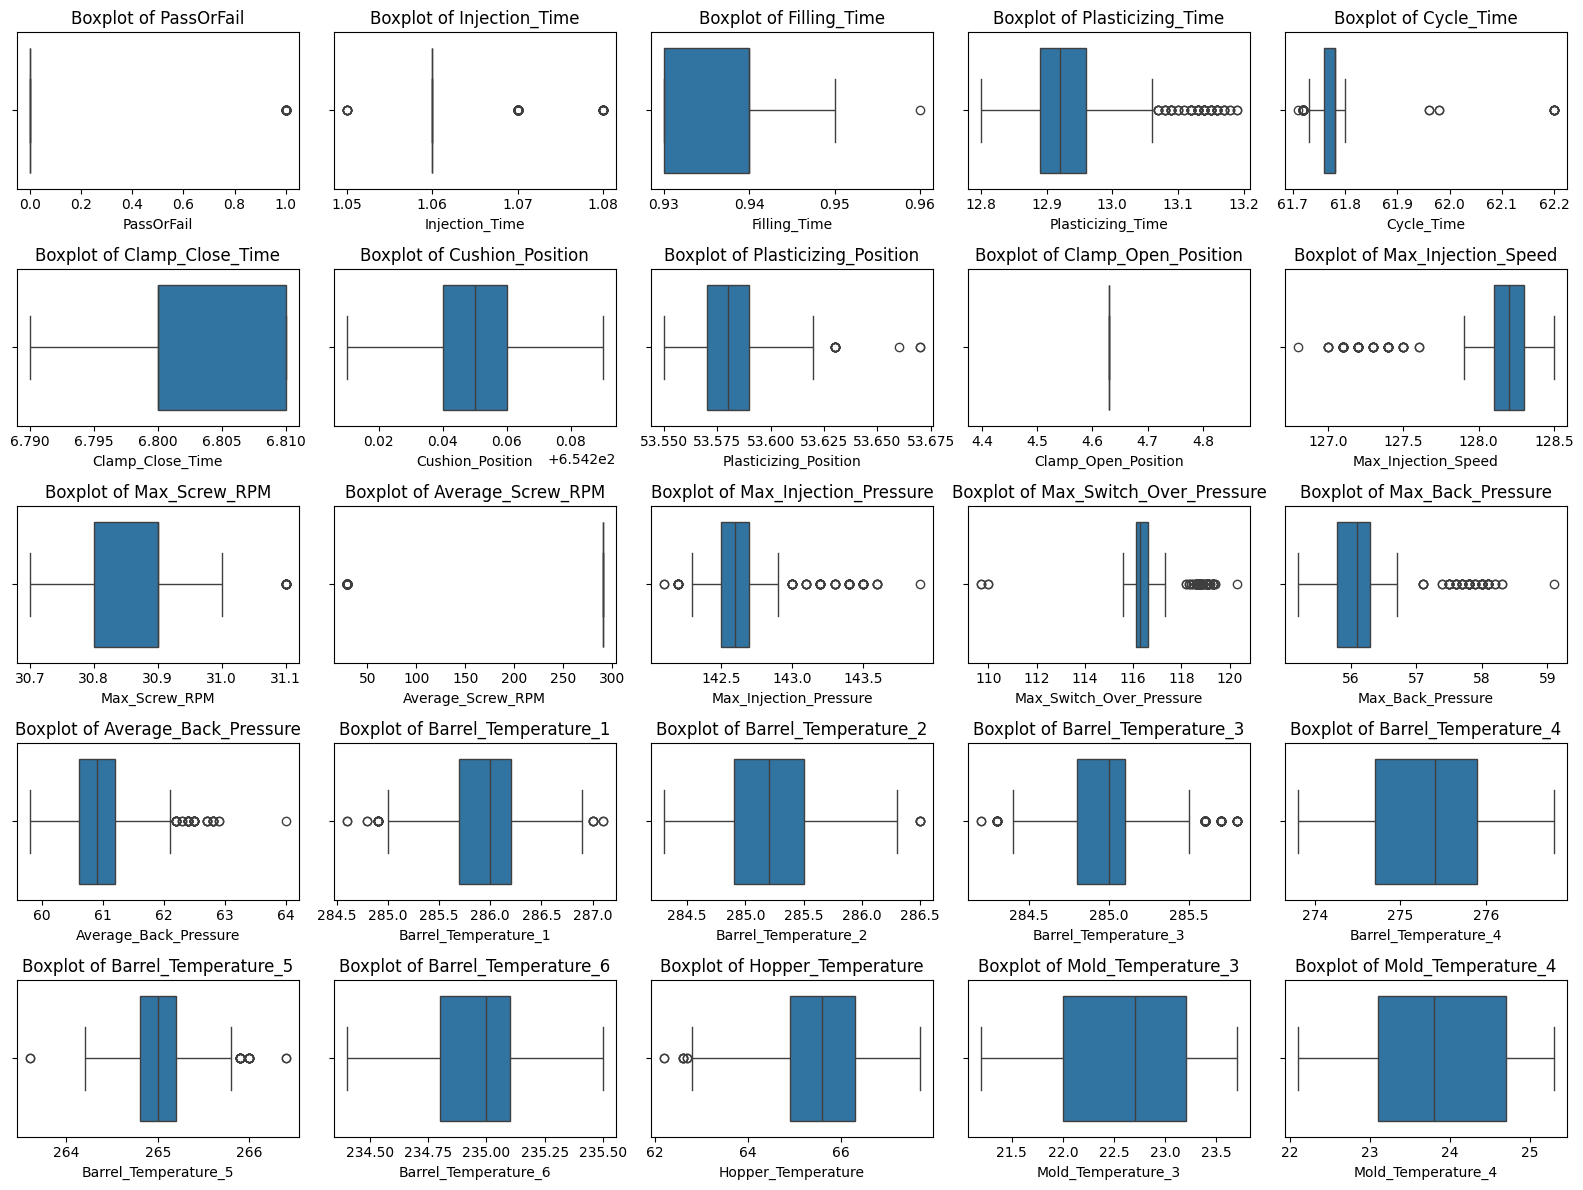

In [96]:
# Generate boxplots for all numeric columns in the rg3 dataset
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=rg3[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [97]:
# rg3 이상치 제거
def handle_outliers_iqr(data, columns):

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Numeric columns excluding 'PassOrFail'
numeric_columns = rg3.select_dtypes(include=['float64', 'int32']).columns.drop('PassOrFail')

# Apply the outlier handling function
rg3_no_outliers = handle_outliers_iqr(rg3.copy(), numeric_columns)

# Display the size of the dataset after outlier removal
rg3.shape, rg3.shape


((1256, 25), (1256, 25))

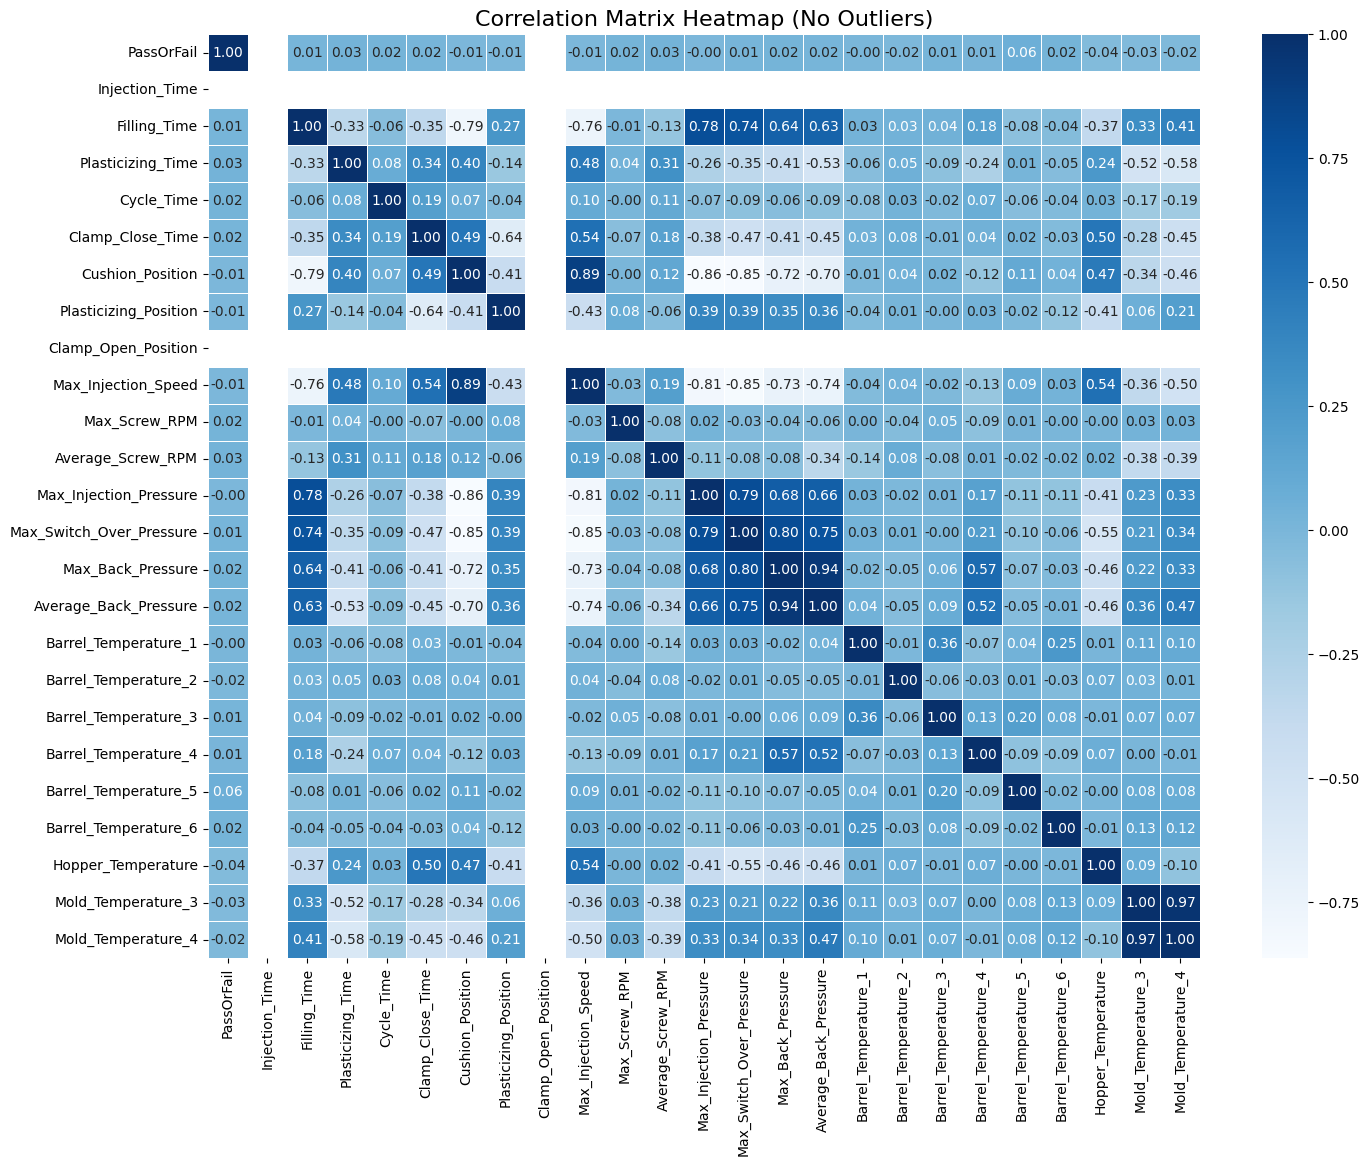

PassOrFail                  1.000000
Barrel_Temperature_5        0.060567
Plasticizing_Time           0.030658
Average_Screw_RPM           0.028411
Cycle_Time                  0.024138
Max_Back_Pressure           0.022901
Max_Screw_RPM               0.020741
Barrel_Temperature_6        0.018843
Average_Back_Pressure       0.017726
Clamp_Close_Time            0.016277
Barrel_Temperature_3        0.014702
Max_Switch_Over_Pressure    0.011195
Filling_Time                0.011105
Barrel_Temperature_4        0.006218
Barrel_Temperature_1       -0.001460
Max_Injection_Pressure     -0.004075
Max_Injection_Speed        -0.007030
Cushion_Position           -0.009008
Plasticizing_Position      -0.009249
Barrel_Temperature_2       -0.016481
Mold_Temperature_4         -0.022613
Mold_Temperature_3         -0.025973
Hopper_Temperature         -0.036266
Injection_Time                   NaN
Clamp_Open_Position              NaN
Name: PassOrFail, dtype: float64

In [98]:
# Generate a correlation matrix for the dataset without outliers
correlation_matrix = rg3_no_outliers.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (No Outliers)", fontsize=16)
plt.show()

# Extract correlations with 'PassOrFail' and sort by absolute value
pass_or_fail_correlation = correlation_matrix['PassOrFail'].sort_values(ascending=False)
pass_or_fail_correlation

In [99]:
rg3['Injection_Time'].unique()

array([1.05999994, 1.04999995, 1.07000005, 1.08000004])

In [100]:
rg3['Clamp_Open_Position'].unique()

array([4.63000011])

In [101]:
# 이상치를 평균으로 대체하는 함수 정의
def handle_outliers_iqr_with_mean(data, columns):

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # 이상치를 평균값으로 대체
        mean = data[col].mean()
        data[col] = data[col].apply(lambda x: mean if (x < lower_bound or x > upper_bound) else x)
    return data

# PassOrFail 열을 제외한 수치형 열에 대해 처리
numeric_columns = rg3.select_dtypes(include=['float64', 'int32']).columns.drop('PassOrFail')

# 이상치를 평균으로 대체
rg3 = handle_outliers_iqr_with_mean(rg3, numeric_columns)

# 처리된 데이터셋 확인
rg3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                1256 non-null   int32  
 1   Injection_Time            1256 non-null   float64
 2   Filling_Time              1256 non-null   float64
 3   Plasticizing_Time         1256 non-null   float64
 4   Cycle_Time                1256 non-null   float64
 5   Clamp_Close_Time          1256 non-null   float64
 6   Cushion_Position          1256 non-null   float64
 7   Plasticizing_Position     1256 non-null   float64
 8   Clamp_Open_Position       1256 non-null   float64
 9   Max_Injection_Speed       1256 non-null   float64
 10  Max_Screw_RPM             1256 non-null   float64
 11  Average_Screw_RPM         1256 non-null   float64
 12  Max_Injection_Pressure    1256 non-null   float64
 13  Max_Switch_Over_Pressure  1256 non-null   float64
 14  Max_Back

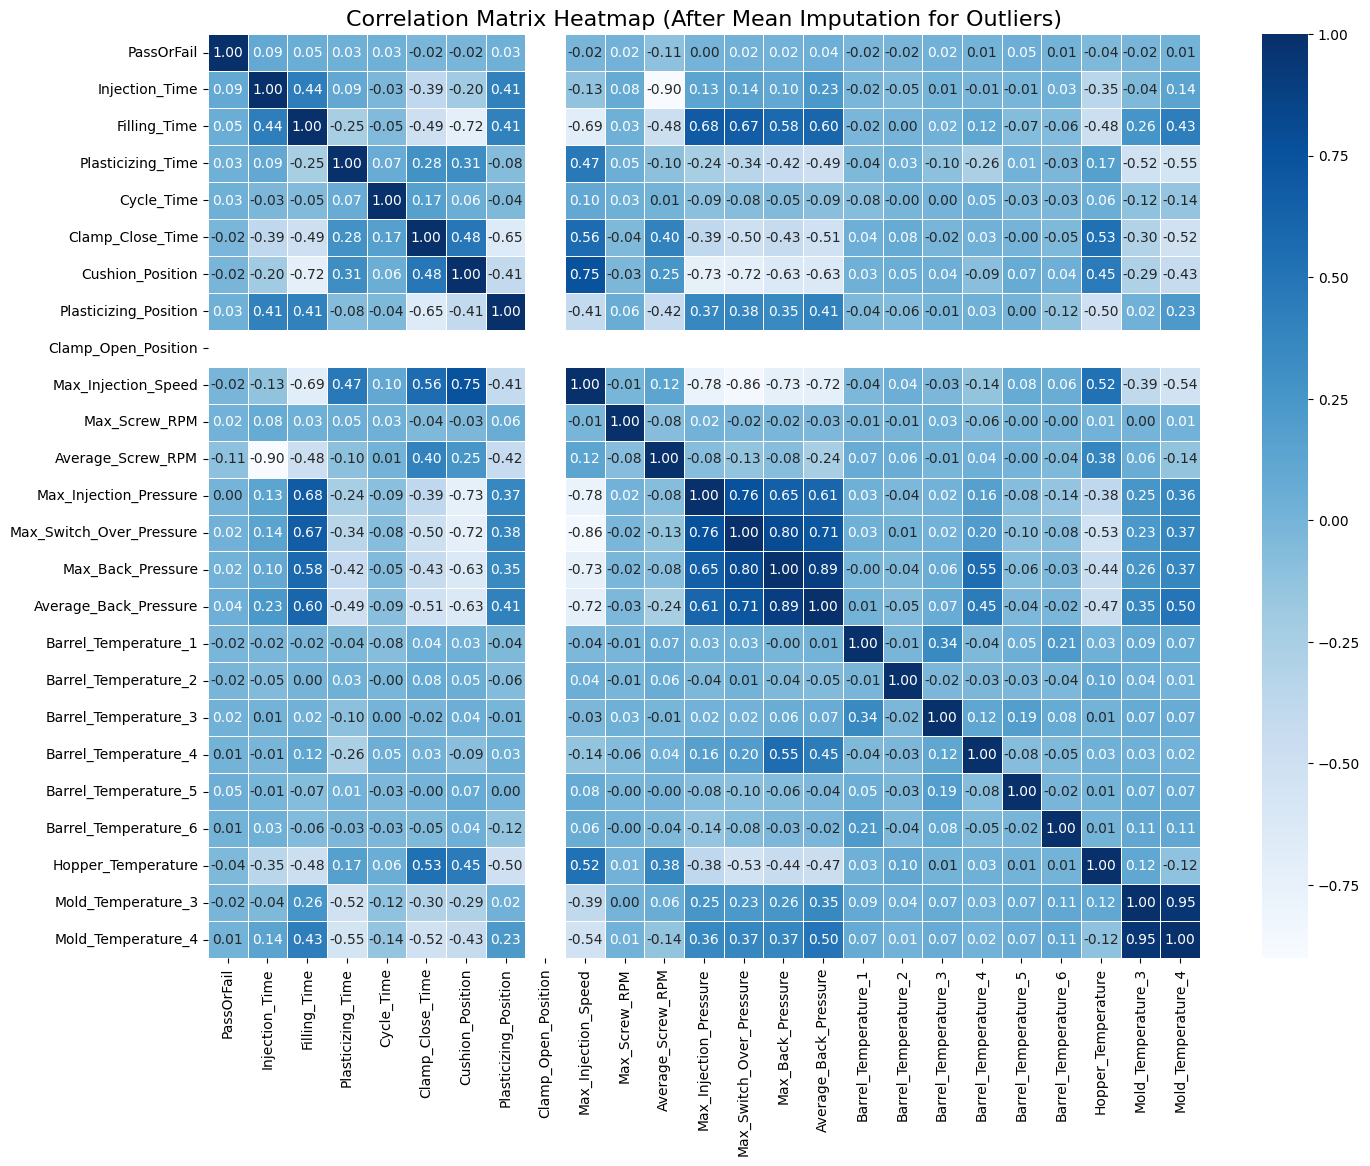

In [102]:
# Generate a correlation matrix for the rg3 dataset after outlier treatment with mean substitution
correlation_matrix_mean_imputed = rg3.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_mean_imputed, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After Mean Imputation for Outliers)", fontsize=16)
plt.show()


In [103]:
# Identify and display the variables that have a high correlation with 'PassOrFail'
# Sort the correlation values by absolute value to identify the most significant ones
correlation_with_target = correlation_matrix_mean_imputed['PassOrFail'].sort_values(ascending=False)

# Display the most correlated variables
correlation_with_target

PassOrFail                  1.000000
Injection_Time              0.092214
Filling_Time                0.054871
Barrel_Temperature_5        0.045261
Average_Back_Pressure       0.041042
Cycle_Time                  0.034261
Plasticizing_Position       0.031566
Plasticizing_Time           0.029694
Barrel_Temperature_3        0.024277
Max_Switch_Over_Pressure    0.021504
Max_Back_Pressure           0.018106
Max_Screw_RPM               0.018077
Barrel_Temperature_6        0.011161
Mold_Temperature_4          0.008891
Barrel_Temperature_4        0.007197
Max_Injection_Pressure      0.004163
Cushion_Position           -0.015397
Mold_Temperature_3         -0.015742
Max_Injection_Speed        -0.016444
Barrel_Temperature_2       -0.016516
Barrel_Temperature_1       -0.020658
Clamp_Close_Time           -0.022476
Hopper_Temperature         -0.044385
Average_Screw_RPM          -0.109437
Clamp_Open_Position              NaN
Name: PassOrFail, dtype: float64

In [104]:
rg3=rg3.drop(columns=['Clamp_Open_Position'])

In [105]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# VIF 계산을 위한 함수 정의
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Variable"] = data.columns
    vif["VIF"] = [calculate_single_vif(data, i) for i in range(data.shape[1])]
    return vif

# 각 변수에 대해 VIF 계산
def calculate_single_vif(data, i):
    x = data.drop(data.columns[i], axis=1)  # 해당 변수 제외한 독립변수
    y = data.iloc[:, i]  # 해당 변수
    model = LinearRegression()
    try:
        model.fit(x, y)
        r2 = model.score(x, y)
        if r2 >= 1.0:
            return np.inf  # R^2 = 1일 경우 VIF는 무한대
        return 1 / (1 - r2)  # VIF 계산
    except:
        return np.nan  # 계산 실패 시 NaN 반환

# 'PassOrFail'을 제외한 수치형 데이터 선택
numeric_columns = rg3.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = [col for col in numeric_columns if col != 'PassOrFail']  # 'PassOrFail' 제외

# 상수 열 확인 및 제거
constant_columns = [col for col in numeric_columns if rg3[col].nunique() == 1]
if constant_columns:
    print(f"상수 열 제거: {constant_columns}")
    numeric_columns = [col for col in numeric_columns if col not in constant_columns]
    
# VIF 데이터 선택
vif_data = rg3[numeric_columns]

# VIF 계산
vif_result = calculate_vif(vif_data)

# VIF 결과 출력
vif_result.sort_values(by="VIF", ascending=False)


Variable        VIF
22        Mold_Temperature_4  82.596385
21        Mold_Temperature_3  68.787195
12         Max_Back_Pressure  11.909285
9          Average_Screw_RPM   8.291321
13     Average_Back_Pressure   7.551047
7        Max_Injection_Speed   6.856620
11  Max_Switch_Over_Pressure   6.501267
0             Injection_Time   5.826008
10    Max_Injection_Pressure   4.085047
1               Filling_Time   3.709593
4           Clamp_Close_Time   3.576320
5           Cushion_Position   3.359046
20        Hopper_Temperature   2.900650
17      Barrel_Temperature_4   2.492828
6      Plasticizing_Position   2.281765
2          Plasticizing_Time   2.067226
14      Barrel_Temperature_1   1.240698
16      Barrel_Temperature_3   1.225241
19      Barrel_Temperature_6   1.171423
18      Barrel_Temperature_5   1.095870
3                 Cycle_Time   1.066052
15      Barrel_Temperature_2   1.054076
8              Max_Screw_RPM   1.033395

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 'PassOrFail'을 제외한 수치형 데이터 선택 (float64, int32 타입의 열만 선택)
numeric_columns = rg3.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = numeric_columns[numeric_columns != 'PassOrFail']  # 'PassOrFail' 제외

# 수치형 데이터만 선택하여 표준화 (스케일링)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rg3[numeric_columns])

# PCA 적용: 주성분 분석
pca = PCA()
pca.fit(scaled_data)

# 각 주성분이 설명하는 분산 비율
explained_variance = pca.explained_variance_ratio_

# PCA 결과로 나온 주요 성분들
pca_df = pd.DataFrame(pca.components_, columns=numeric_columns)

# 분산 비율과 주요 성분 결과 출력
explained_variance, pca_df.head()


(array([3.14091399e-01, 1.11045799e-01, 8.16106024e-02, 6.17881508e-02,
        5.33093182e-02, 4.71558126e-02, 4.63563502e-02, 4.37889300e-02,
        4.03668724e-02, 3.66772592e-02, 3.46009227e-02, 2.63085069e-02,
        2.47478152e-02, 1.61318434e-02, 1.19657126e-02, 1.14973085e-02,
        1.09468052e-02, 8.93660762e-03, 7.83233252e-03, 4.84276969e-03,
        3.51950393e-03, 2.19459809e-03, 2.84779210e-04]),
    Injection_Time  Filling_Time  Plasticizing_Time  Cycle_Time  \
 0       -0.130964     -0.301477           0.182083    0.046688   
 1       -0.453702     -0.120589          -0.324746   -0.039896   
 2        0.234243     -0.005659          -0.113928   -0.155254   
 3        0.099464     -0.026394           0.008223    0.061638   
 4        0.266662     -0.008795          -0.207854    0.269173   
 
    Clamp_Close_Time  Cushion_Position  Plasticizing_Position  \
 0          0.262422          0.304015              -0.212503   
 1          0.149104          0.008283          

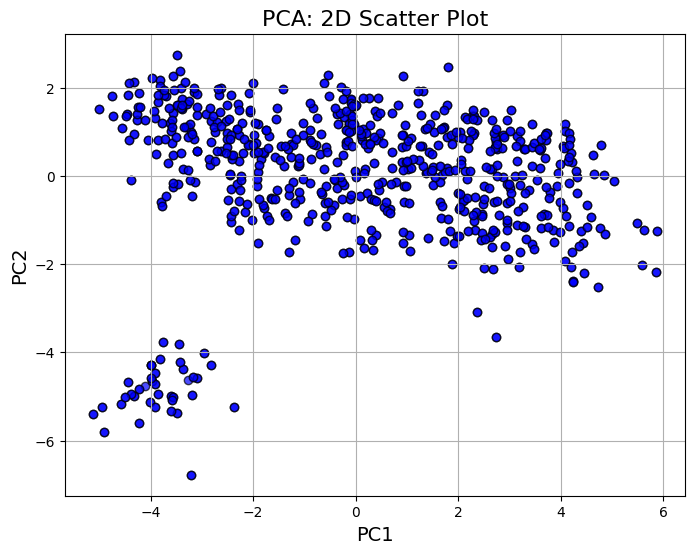

In [107]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 준비 (이미 표준화가 되어 있다고 가정)
numeric_columns = rg3.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = numeric_columns[numeric_columns != 'PassOrFail']  # 'PassOrFail' 제외

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rg3[numeric_columns])

# PCA 적용
pca = PCA(n_components=2)  # 두 개의 주성분으로 축소
pca_result = pca.fit_transform(scaled_data)

# 주성분 분석 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('PCA: 2D Scatter Plot', fontsize=16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.grid(True)
plt.show()


In [108]:
rg3['PassOrFail'].value_counts()

PassOrFail
0    1224
1      32
Name: count, dtype: int64

In [110]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.datasets import make_classification

# 예제 데이터 생성
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3, n_redundant=1,
                           flip_y=0, n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# 예제 데이터 생성
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# 데이터셋을 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SMOTE 객체 생성
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto'는 소수 클래스를 다수 클래스의 수에 맞춥니다.

# 샘플링 적용
try:
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train_res))
except ValueError as e:
    print(e)
    # 비율 조정이 필요할 수 있음

# 성능 평가
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Resampled dataset shape Counter({1: 676, 0: 676})

Confusion Matrix:


ValueError: Found input variables with inconsistent numbers of samples: [250, 1348]

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Step 1: 데이터 준비 (훈련 데이터와 테스트 데이터 분리)
X = rg3.drop(columns=['PassOrFail'])  # 특성 변수
y = rg3['PassOrFail']  # 목표 변수

# 훈련 데이터와 테스트 데이터로 분리 (80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: XGBoost 모델 설정
model = xgb.XGBClassifier(
    eval_metric='mlogloss',  # 다중 클래스 로지스틱 손실 함수
    n_jobs=-1,               # 병렬 처리 활성화
    random_state=42
)

# Step 3: 하이퍼파라미터 튜닝을 위한 GridSearchCV 설정
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Step 4: 모델 학습 및 튜닝
grid_search.fit(X_train, y_train)

# Step 5: 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"최적 모델의 정확도: {accuracy:.4f}")
print("분류 성능 보고서:")
print(classification_report(y_test, y_pred))


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Step 1: SMOTE를 사용하여 불량품 데이터를 오버샘플링
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: XGBoost 모델 학습
model = xgb.XGBClassifier(eval_metric='mlogloss')
model.fit(X_resampled, y_resampled)

# Step 3: 예측
y_pred_resampled = model.predict(X_test)

# Step 4: 모델 평가 (정밀도, 재현율, F1-score 사용)
print(classification_report(y_test, y_pred_resampled))


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.datasets import make_classification

# 예제 데이터 생성
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3, n_redundant=1,
                           flip_y=0, n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ADASYN으로 9:1 비율로 오버샘플링
adasyn = ADASYN(sampling_strategy=0.3, random_state=42)  # 9:1 비율
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# 데이터 분포 확인
print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_resampled))

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 예측 및 평가
y_pred = model.predict(X_test)

# 성능 평가
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
